<img width="800px" src="../fidle/img/header.svg"></img>

# <!-- TITLE --> [K3MNIST2] - Simple classification with CNN
<!-- DESC --> An example of classification using a convolutional neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network
 - Implementation with Keras


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Installation de l'environnement Fidle

In [1]:
import os

# Create a directory named "fidle-tp"
os.makedirs('fidle-tp', exist_ok=True)

In [2]:
# Install PyTorch
!pip install torch torchvision torchaudio

# Install additional packages
!pip install torch-geometric torchtext torchdata lightning tensorboard keras transformers numpy scikit-image scikit-learn matplotlib plotly seaborn barviz pyarrow pandas pandoc pyyaml jupyterlab fidle


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
# Install Fidle notebooks and datasets
# Note: Ensure you have the `fid` command installed, or use an equivalent method to download the datasets.
!fid install --quiet



fid - Your favorite Fidle admin command :-)    (v2.3.2)

Install Fidle notebooks in . : 

Install ressource : fidle-master
In directory      : .
Extract  :       [########################################] 100.0% of 154 files
Installed in : ./fidle-master-3.0.11
Done.

Install Fidle datasets in . : 

Install ressource : datasets-fidle
In directory      : .
Download :       [########################################] 100.0% of 528.8 Mo
Extract  :       [########################################] 100.0% of 51963 files
Installed in : ./datasets-fidle
Done.



In [4]:
# Perform a check to ensure everything is set up correctly
!fid check


fid - Your favorite Fidle admin command :-)    (v2.3.2)

Notebooks and datasets can only be found if they are in/near the explored folder.
Explored directory is : /content

Datasets dir found : 

    //content/datasets-fidle                             (Datasets Fidle / 2.0)
    /content/datasets-fidle                              (Datasets Fidle / 2.0)

    The environment variable FIDLE_DATASETS_DIR is :     undefined

Notebooks dir found : 

    //content/fidle-master-3.0.11                        (Notebooks Fidle / 3.0.11)
    /content/fidle-master-3.0.11                         (Notebooks Fidle / 3.0.11)

Check environment : 

    Python               : Ok         (3.10.12)
    Fidle module         : Ok         (2.3.2)
    keras                : Ok         (3.4.1)
    numpy                : Ok         (1.26.4)
    sklearn              : Ok         (1.3.2)
    yaml                 : Ok         (6.0.2)
    skimage              : Ok         (0.23.2)
    matplotlib           : Ok    

In [5]:
# Reinstall notebooks or datasets if necessary
# !fid install_notebooks
# !fid install_datasets

## Step 1 - Init python stuff

In [6]:
import os
os.environ['KERAS_BACKEND'] = 'torch'

import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

# Init Fidle environment
import fidle

run_id, run_dir, datasets_dir = fidle.init('K3MNIST2')

<br>**FIDLE - Environment initialization**

Version              : 2.3.2
Run id               : K3MNIST2
Run dir              : ./run/K3MNIST2
Datasets dir         : //content/datasets-fidle
Start time           : 19/08/24 10:10:40
Hostname             : e583854ad4ec (Linux)
Tensorflow log level : Info + Warning + Error  (=0)
Update keras cache   : True
Update torch cache   : False
Save figs            : ./run/K3MNIST2/figs (False)
keras                : 3.4.1
numpy                : 1.26.4
sklearn              : 1.3.2
yaml                 : 6.0.2
matplotlib           : 3.7.1
pandas               : 2.1.4
torch                : 2.3.1+cu121


Verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [7]:
fit_verbosity = 1

Override parameters (batch mode) - Just forget this cell

In [8]:
fidle.override('fit_verbosity')

## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://keras.io/datasets)

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [10]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


### Have a look

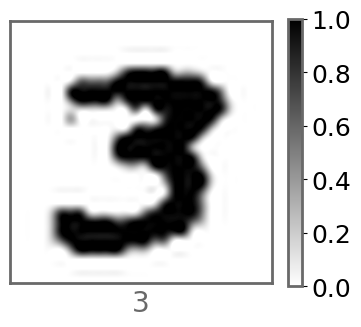

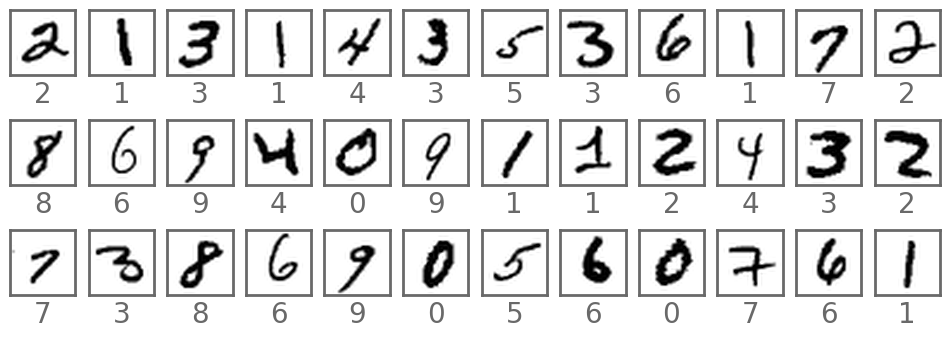

In [11]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about :
 - [Optimizer](https://keras.io/api/optimizers)
 - [Activation](https://keras.io/api/layers/activations)
 - [Loss](https://keras.io/api/losses)
 - [Metrics](https://keras.io/api/metrics)

In [12]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5 - Train the model

In [14]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.4603 - loss: 1.5884 - val_accuracy: 0.9337 - val_loss: 0.2511
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8754 - loss: 0.4049 - val_accuracy: 0.9585 - val_loss: 0.1395
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9176 - loss: 0.2682 - val_accuracy: 0.9700 - val_loss: 0.0997
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.9315 - loss: 0.2263 - val_accuracy: 0.9739 - val_loss: 0.0824
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9440 - loss: 0.1861 - val_accuracy: 0.9769 - val_loss: 0.0738
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9492 - loss: 0.1687 - val_accuracy: 0.9798 - val_loss: 0.0653
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9528 - loss: 0.1568 - val_accuracy: 0.9811 - val_loss: 0.0580
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9564 - loss: 0.143

## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.7%

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0365
Test accuracy : 0.9872


### 6.2 - Plot history

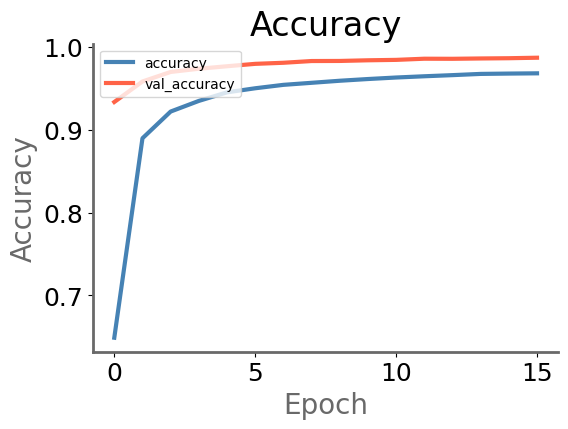

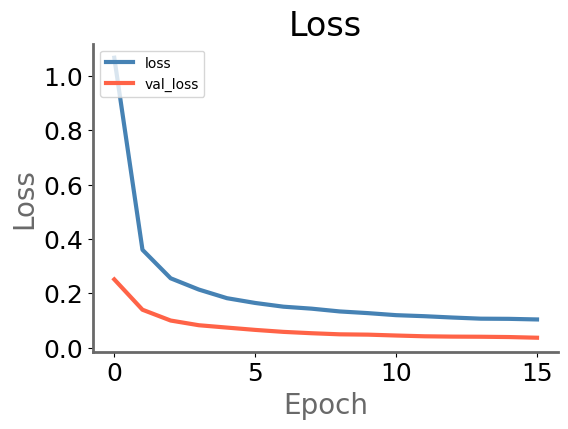

In [16]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


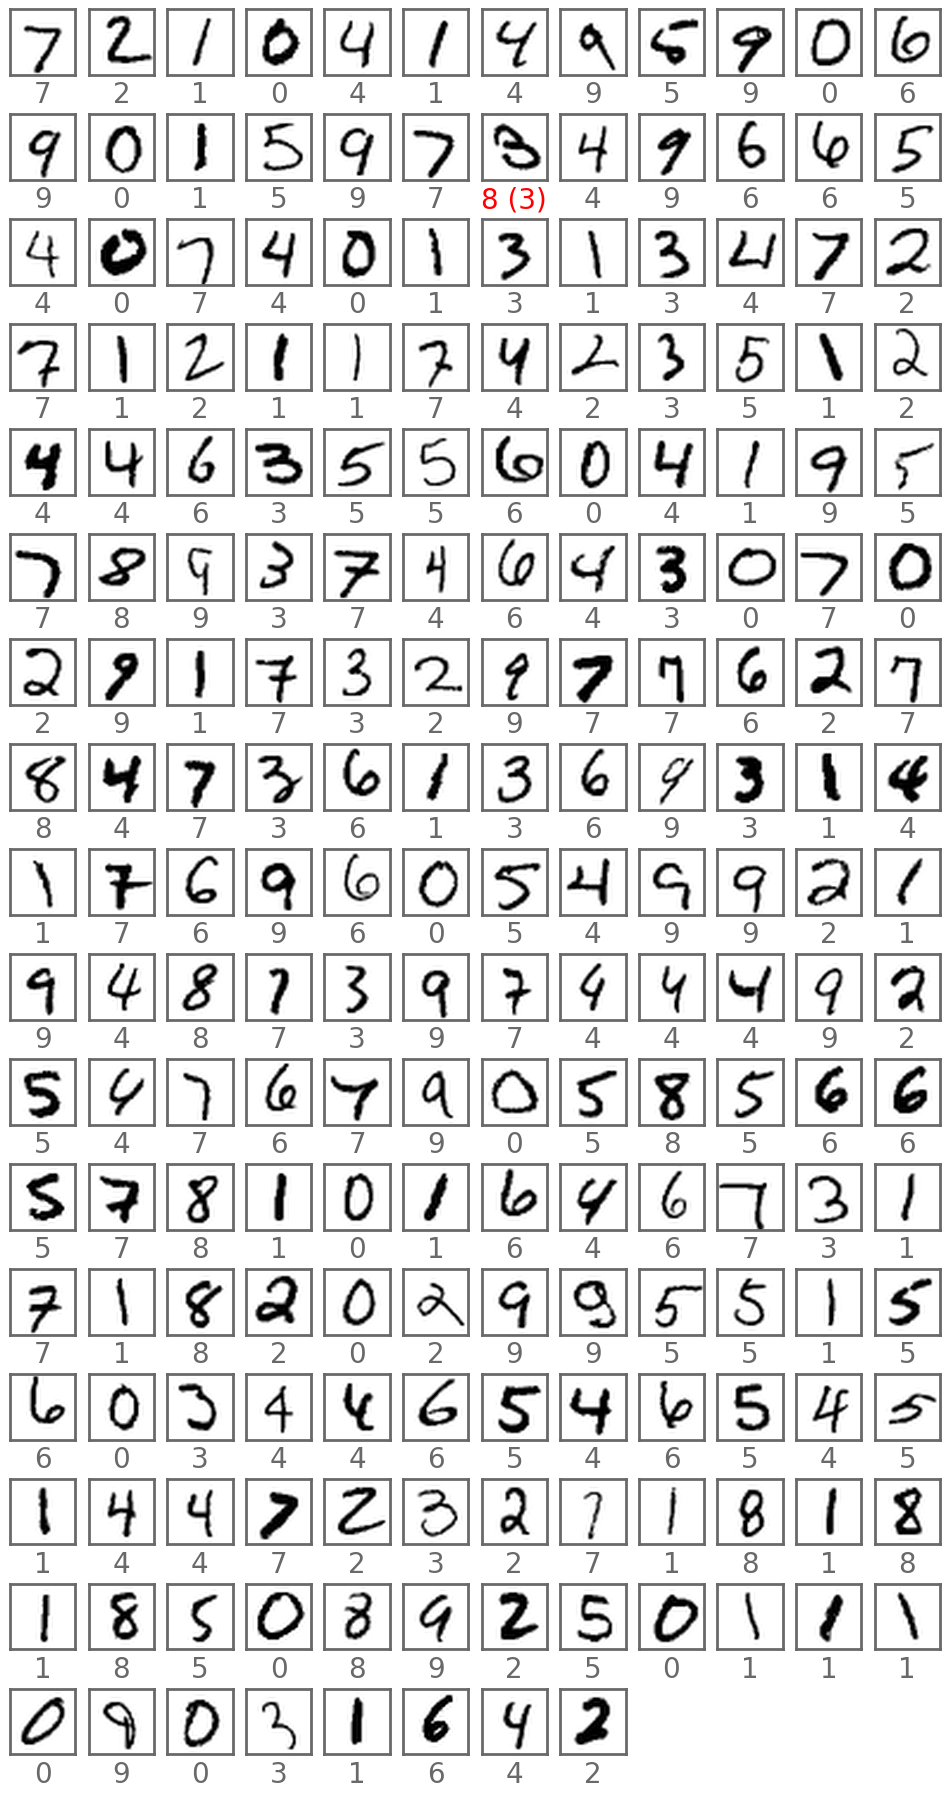

In [17]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

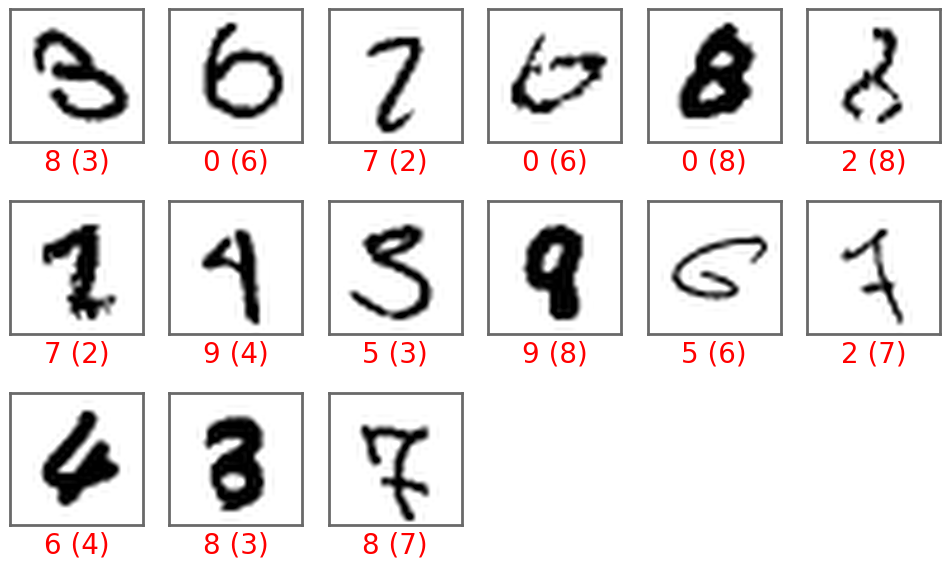

In [18]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

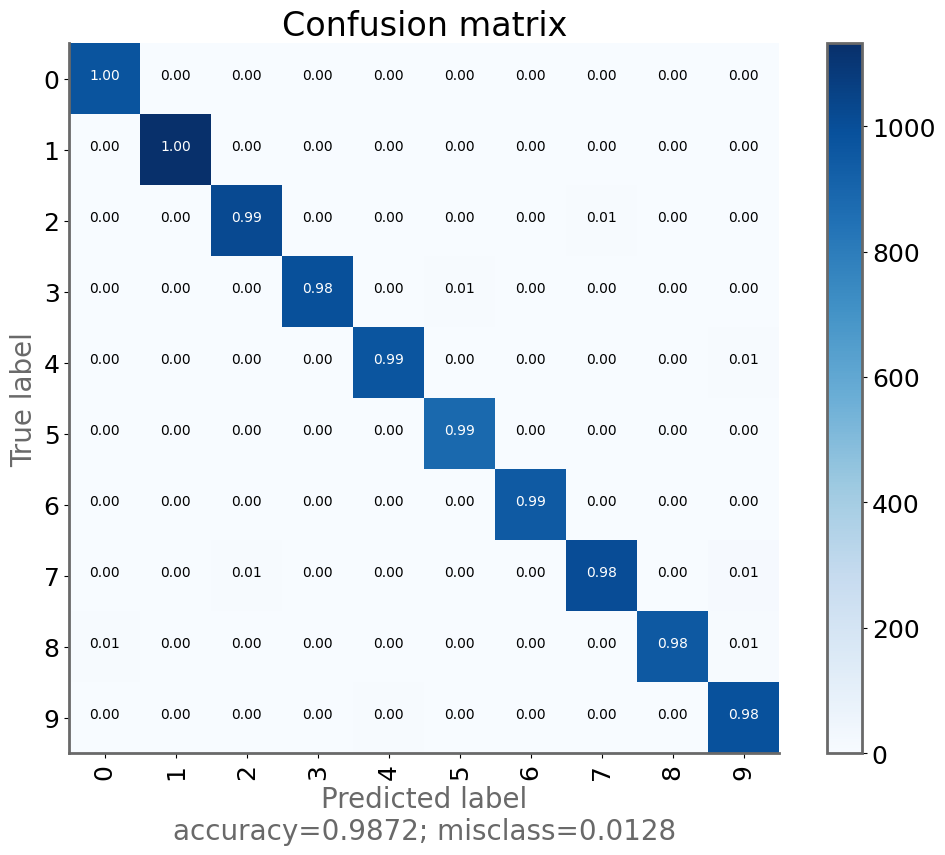

In [19]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [20]:
fidle.end()

**End time :** 19/08/24 10:14:15  
**Duration :** 00:03:35 866ms  
This notebook ends here :-)  
[https://fidle.cnrs.fr](https://fidle.cnrs.fr)

<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/logo-paysage.svg"></img>